# Aula 2

__Susana Bouchardet [susana.bouchardet@databootcamp.com]__

Vamos continuar usando o __Pandas__ para trabalhar nosso dados.

Antes de começar vamos revisar a __Aula 1__

![panda](https://i.pinimg.com/originals/44/fe/40/44fe40958eae366ace69a1fdb45cb9b2.jpg)

# 0 - Revisão

In [1]:
#importando dados
import pandas
titanic = pandas.read_csv("titanic.csv")

In [2]:
# Vendo Dados
titanic.head(9)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [3]:
# Selecionando um grupo do colunas

# titanic[["PassengerId","SibSp","Parch"]].head()
# ou
colunas_selecionadas = ["PassengerId","SibSp","Parch"]
titanic[colunas_selecionadas].head()

,PassengerId,SibSp,Parch
0,1,1,0
1,2,1,0
2,3,0,0
3,4,1,0
4,5,0,0


In [4]:
# Tranformando dados com apply

# Aplicando uma função aos dados para transformar a idade em faixas etárias.
# O resultado do apply é um Série.
def faixa_etaria(linhas):
    idade = linhas["Age"]
    if idade < 10:
        return "criança"
    elif idade >=10 and idade < 18:
        return "adolescente"
    elif idade >=18 and idade < 40:
        return "adulto"
    elif idade >= 40:
        return "idoso"
    else:
        idade
        
# Criamos a coluna "faixa_etaria" onde atribuímos o valor da Série resultante do apply
titanic["faixa_etaria"] = titanic.apply(faixa_etaria, axis=1)

## 1 - Selecionando um subconjunto de dados

Nem sempre vamos precisar usar todos os dados do nosso Dataframe.

Em casos em que desejamos validar alguma etapa da análise, por exemplo, é útil selecionar apenas algumas colunas e linhas.

Selecionando um subconjunto de __colunas__

In [5]:
# Já fizemos isso na Aula 1 da seguinte forma : titanic[["faixa_etaria","Age"]]
# agora, vamos usar o "loc"

titanic.loc[:,["Pclass","Age"]].head()

,Pclass,Age
0,3,22.0
1,1,38.0
2,3,26.0
3,1,35.0
4,3,35.0


Selecionando um subconjunto de __linhas__

In [6]:
titanic.loc[10:30,:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,faixa_etaria
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,criança
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,idoso
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S,adulto
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S,adulto
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S,adolescente
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S,idoso
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q,criança
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,None
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S,adulto
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,None


<span style="color:blue">__Como selecionando as colunas Embarked e Pclass das linhas entre 20 e 30 ?__</span>

In [7]:
titanic.loc[20:30,["Embarked","Pclass" ]]

,Embarked,Pclass
20,S,2
21,S,2
22,Q,3
23,S,1
24,S,3
25,S,3
26,C,3
27,S,1
28,Q,3
29,S,3


__Relembrando!__ Uma coluna é uma Série. Uma Série é um tipo de lista.
Então podemos __ordenar__!

In [8]:
# Ordenando a idade crescnete
idades = titanic.loc[70:75,"Age"]
sorted(idades)

[16.0, 21.0, 25.0, 26.0, 32.0, 32.0]

Podemos notar que quando ordenamos a série, perdemos os índices.
__Existe uma forma de fazer isso sem perder os índices!__

In [9]:
idades_sorted = idades.sort_values()
idades_sorted

71    16.0
72    21.0
75    25.0
73    26.0
70    32.0
74    32.0
Name: Age, dtype: float64

Por padrãos, as funções de ordenação, ordenam de maneira crescente.

__Podemos ordenar de maneira descrescente__

In [10]:
tarifa = titanic.loc[70:75,"Fare"]
sorted(tarifa, reverse=True)

[73.5,
 56.495800000000003,
 46.899999999999999,
 14.4542,
 10.5,
 7.6500000000000004]

Também podemos ordenar de maneira descrescente sem perder o índice.

In [11]:
tarifa_sorted_reverse = tarifa.sort_values(ascending=False)
tarifa_sorted_reverse

72    73.5000
74    56.4958
71    46.9000
73    14.4542
70    10.5000
75     7.6500
Name: Fare, dtype: float64

Agora que aprendemos a pegar um subconjunto do nosso dado, podemos validar as operações feitas. 

__Validar em 5 linhas é mais facil que em 50 ou 500!__

## 2 - Apagando colunas 

Nem todas as colunas serão usadas para analise, a coluna `Name`, por exemplo, pode não ser muito relevante

Existem duas maneiras de apagar colunas

- Apagar diretamente no dataframe (__PERIGOSO__)

>Se fizermos isso, não teremos mais como acessar a coluna apagada.

>Se precisarmos dela de novo, teremos que reimportar os dados.

In [12]:
# Direto no dataframe
del titanic["Age"]

In [13]:
# Se se arrepender, como arruma:
titanic = pandas.read_csv("titanic.csv")

- Apagar gerando um novo dataframe sem a coluna

Podemos fazer isso:

1.copiando nosso dataframe e apagando a coluna apenas da cópia

> __(IMPORTANTE)__: Sem o `.copy()` ainda estaremos apagando o dataframe original!

In [14]:
# Fazendo isso de um jeito menos perigoso
titanic2 = titanic.copy()
del titanic2["Age"]

In [15]:
titanic2.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [16]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

2.usando o __dropna__

Por dentro, o `dropna` faz algo semelhante ao que fizemos anteriormente (copiar o dataframe e apagar a coluna na cópia). 

O `dropna` retorna o resultado da modificação no dataframe, sem alterar o original

> Obs.: O `dropna` pode ser usado para apagar linhas e colunas apenas mudando o eixo (`axis`)

![eixos](https://i.stack.imgur.com/DL0iQ.jpg)

In [17]:
# Drop
# Apagar coluna
titanic_coluna_apagada = titanic.drop(["Age"], axis=1)
titanic_coluna_apagada.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S


In [18]:
# Drop
# Apagar linhas
titanic_linha_apagada = titanic.drop([0,1,2,6], axis=0)
titanic_linha_apagada.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


## 3 - Tratando valores nulos

__Porque tratar valores nulos?__

Valores nulos atrapalham a utilização de alguritmos de ML e podem atrapalhar algumas analises tbm. 


In [19]:
# Contando quantos valores nulos temos
# sum(titanic.Age.isnull())
# OU
titanic.Age.isnull().sum()

177

In [20]:
qnt_idades_nulas=titanic.Age.isnull().sum()
print("Quantidade de valores nulos: {}".format(qnt_idades_nulas))

Quantidade de valores nulos: 177


Podemos tratar valores nulos por duas abordagens

### 3.1 - Apagando

In [21]:
idades_nao_nulas = titanic.Age.dropna()
idades_nao_nulas.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [22]:
qnt_idades_nulas_dropna = idades_nao_nulas.isnull().sum()
print("Quantidade de valores nulos: {}".format(qnt_idades_nulas_dropna))

Quantidade de valores nulos: 0


Size x Count :
 - `size` - o tamanho total da série
 - `count` - a quantidade de valores não nulos na série

In [23]:
titanic.Age.size

891

In [24]:
titanic.Age.count()

714

In [25]:
# idades_nao_nulas.size é igual a titanic.Age.count()
idades_nao_nulas.size

714

__Atribuir uma série com os valores nulos apagados a uma coluna do dataset não faz sentido! A coluna vai voltar a possuir valores nulos__


Como o tamanho da Série vai ser diferente da quantidade de linhas do Dataframe, os valores que faltam na série serão colocados como __nulos__. 

In [26]:
titanic["idades_nao_nulas"] = idades_nao_nulas

In [27]:
titanic[["idades_nao_nulas","Age"]].head(10)

,idades_nao_nulas,Age
0,22.0,22.0
1,38.0,38.0
2,26.0,26.0
3,35.0,35.0
4,35.0,35.0
5,NaN,NaN
6,54.0,54.0
7,2.0,2.0
8,27.0,27.0
9,14.0,14.0


### 3.2 - Preenchendo com algum valor

Se desejamos preencher os valores nulos com algum valor, podemos usar o __fillna__.

__Nesse caso, se criarmos uma coluna com o resultado do `fillna`, ela realmente não terá mais valores nulos!__

In [28]:
# Preenchendo as idades nulas com -1
serie_idade_sem_nulo = titanic.Age.fillna(-1)
serie_idade_sem_nulo.isnull().sum()

0

In [29]:
serie_idade_sem_nulo.count()

891

In [30]:
titanic["Age_fillna_1"] = serie_idade_sem_nulo

In [31]:
titanic.Age_fillna_1.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age_fillna_1, dtype: float64

<IPython.core.display.Javascript object>


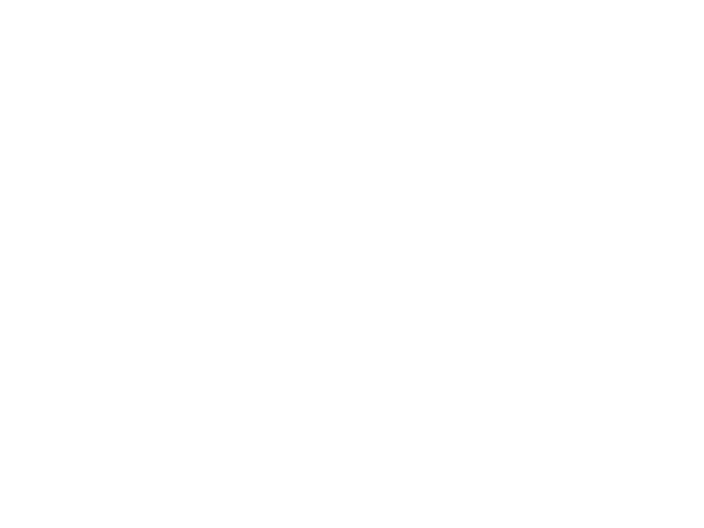

In [32]:
%matplotlib notebook
titanic["Age_fillna_1"].plot.hist()
titanic["Age"].plot.hist()

Preencher com `-1` não parece ser a melhor escolha.

<span style="color:blue">__Vamos preencher os valores de idade nulo com a médias das idades__</span>

In [33]:
titanic["Age_fillna_mean"] = titanic.Age.fillna(titanic.Age.mean())

<IPython.core.display.Javascript object>


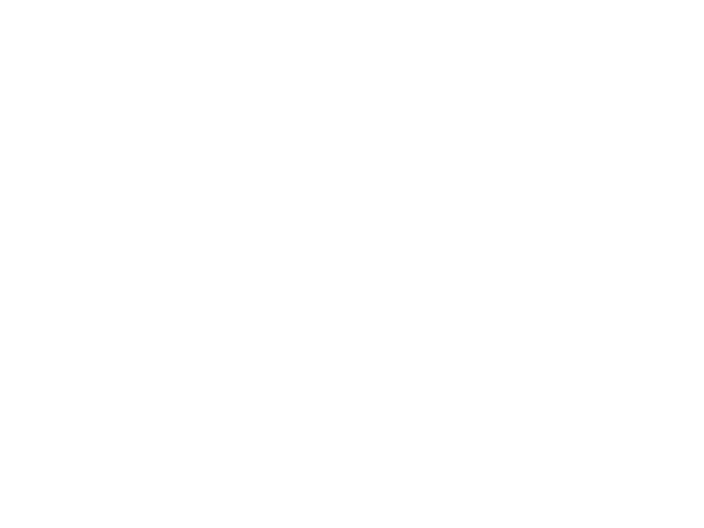

In [34]:
%matplotlib notebook
titanic["Age_fillna_mean"].plot.hist()
titanic["Age"].plot.hist()

A distribuição já melhorou!

Quando preenchemos com `-1` a diferença entre os histogramas era bem maior.

## 4 - Agrupando

Podemos agrupar os dados baseados em uma coluna.O agrupamento aplicando uma função nos dados que estão no mesmo grupo

In [35]:
# Agrupando pessoas por cabine
pessoas_por_cabine = titanic.groupby("Cabin").count()
pessoas_por_cabine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,idades_nao_nulas,Age_fillna_1,Age_fillna_mean
Cabin,,,,,,,,,,,,,,
A10,1,1,1,1,1,1,1,1,1,1,1,1,1,1
A14,1,1,1,1,1,0,1,1,1,1,1,0,1,1
A16,1,1,1,1,1,1,1,1,1,1,1,1,1,1
A19,1,1,1,1,1,0,1,1,1,1,1,0,1,1
A20,1,1,1,1,1,1,1,1,1,1,1,1,1,1


O resultado foi um Dataframe, que mostra a quantidade de dados não nulos em cada coluna dos grupos das cabines.

Se quisermos apenas o valor de pessoas por cabine, basta selecionarmos uma coluna que tenha todos os dados não nulos (Já que vimos que o `count()` conta apenas os nãos nulos)

In [36]:
# Quantas pessoas tem em cada cabine?
pessoas_por_cabine = titanic.groupby("Cabin")["PassengerId"].count()
pessoas_por_cabine.head()

Cabin
A10    1
A14    1
A16    1
A19    1
A20    1
Name: PassengerId, dtype: int64

Outra maneira é substituir o `count` por `size`, então podemos contar a quantidade de elementos em qualquer coluna, mesmo com valores nulos

In [37]:
# A coluna Age tem valores nulos. Podemos usar o "size" para contar por ela
pessoas_por_cabine = titanic.groupby("Cabin")["Age"].size()
pessoas_por_cabine.head()

Cabin
A10    1
A14    1
A16    1
A19    1
A20    1
Name: Age, dtype: int64

Outra maneira de agrupar é pela soma

In [38]:
# Qual a idade somada das pessoa em cada cabine?
soma_idade = titanic.groupby("Cabin")["Age"].sum()
soma_idade.head()

Cabin
A10    36.0
A14     NaN
A16    48.0
A19     NaN
A20    49.0
Name: Age, dtype: float64

Também podemos agrupar pela média

In [39]:
# Qual a idade média das pessoa em cada cabine?
media_idade = titanic.groupby("Cabin")["Age"].mean()
media_idade.head()

Cabin
A10    36.0
A14     NaN
A16    48.0
A19     NaN
A20    49.0
Name: Age, dtype: float64

O `groupby` seguido de uma operação funciona da seguinte forma:
 1. Agrupa as linhas com valores iguais na coluna do agrupamento. [no código a coluna do agrupamente é colocada `groupby(COLUNA_DO_AGRUPAMENTO)`]
 2. Aplica uma função em cada grupo gerado no passo (1) que transforme todas as linhas em apenas um valor.
 
![groupby](http://i.imgur.com/yjNkiwL.png)

Existe uma maneira mais livre para agruparmos. Podemos usar o __apply!__

In [40]:
# Usando o apply para contar os passageiros por cabine
def contar_pessoas(registros_agrupados):
    return registros_agrupados["PassengerId"].size


pessoas_por_cabine_apply = titanic.groupby("Cabin").apply(contar_pessoas)
pessoas_por_cabine_apply.head()

Cabin
A10    1
A14    1
A16    1
A19    1
A20    1
dtype: int64

<span style="color:blue">__Vamos fazer o agrupamento por cabine somando as idades usando o<span> <span style="color:red">apply</span>__

In [41]:
def contar_pessoas(registros_agrupados):
    return registros_agrupados.Age.sum()


soma_idade_apply_certo = titanic.groupby("Cabin").apply(contar_pessoas)
soma_idade_apply_certo.describe()

count    134.000000
mean      49.465821
std       23.106494
min        4.000000
25%       32.250000
50%       47.000000
75%       60.000000
max      130.000000
dtype: float64

<span style="color:red">__É importante usarmos as funções da própria Série!__</span>

Nesse caso não é bom tratar a Série como lista!

Vamos ver o que acontece se trocarmos `registros_agrupados.Age.sum()` por `sum(registros_agrupados.Age)` na função do apply

In [42]:
def contar_pessoas_errado(registros_agrupados):
    return sum(registros_agrupados.Age)


soma_idade_apply_errado = titanic.groupby("Cabin").apply(contar_pessoas_errado)
soma_idade_apply_errado.describe()

count    128.000000
mean      49.815781
std       23.420234
min        4.000000
25%       32.750000
50%       47.000000
75%       60.250000
max      130.000000
dtype: float64

In [43]:
print("""{} quantidade de não nulos usando o sum
{} quantidade de não nulos usando o apply
""".format(soma_idade.count(),soma_idade_apply_errado.count()))

134 quantidade de não nulos usando o sum
128 quantidade de não nulos usando o apply



__Por que isso acontece?__ 

* O `sum(registros_agrupados.Age)` retorna `NaN` se qualquer elemento da Série for __nulo__. 

Por exemplo, se uma cabine tem passageiros com as idades `[10,20,NaN]`, seu somátório será `NaN`.

* O `registros_agrupados.Age.sum()` retorna `NaN` apenas se todos os elemntos da Série são  __nulo__. 

Então, a cabine de passageiros com as idades `[10,20,NaN]` resulta `30`.

In [44]:
print("""{} quantidade de não nulos usando o sum
{} quantidade de não nulos usando o apply
""".format(soma_idade.count(),soma_idade_apply_certo.count()))

134 quantidade de não nulos usando o sum
134 quantidade de não nulos usando o apply



<span style="color:blue">__Por ultimo, vamos contar quantos homens e mulheres tem o dataframe__</span>

In [45]:
# Usando o count()
soma_idade_apply_certo = titanic.groupby("Sex")["PassengerId"].count()
soma_idade_apply_certo

Sex
female    314
male      577
Name: PassengerId, dtype: int64

In [46]:
# Usando apply
def count_sex(registros):
    return registros["Sex"].count()

titanic.groupby("Sex").apply(count_sex)

Sex
female    314
male      577
dtype: int64

__Com essa série podemos fazer um plot pizza__

<IPython.core.display.Javascript object>


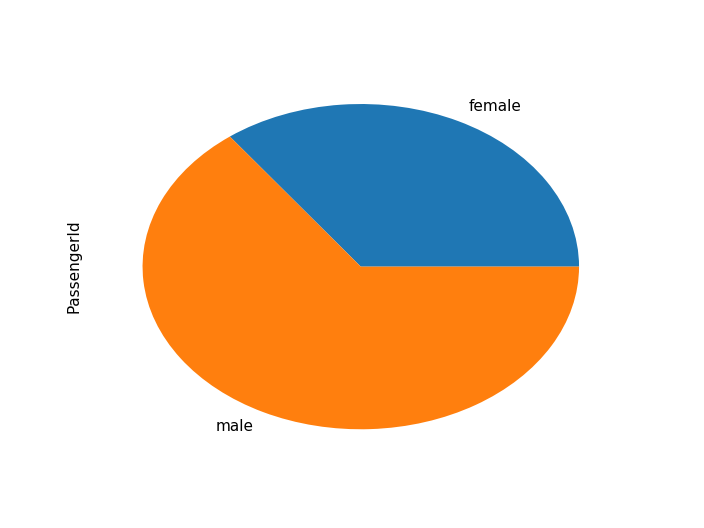

In [47]:
%matplotlib notebook
soma_idade_apply_certo.plot.pie()

<span style="color:blue">__Vamos agrupar o nomes das pessoas por cabine__</span>

Dica:
 - existe um método `join` aplicado a `string` para poder juntar uma lista.

In [48]:
# Usando o join para juntas as strings de uma lista
lista_nomes = ["Susana", "Munaro", "Lais"]
" | ".join(lista_nomes)

'Susana | Munaro | Lais'

In [49]:
# Concatenando Nomes por Cabine com FOR
def concat_string_for(lista):
    resultado = ""
    for i in lista.Name:
        resultado = resultado + " | "+ i
    return resultado

# Concatenando Nomes por Cabine com JOIN
def concat_string_join(valores):
    return " | ".join(valores["Name"])


In [50]:
# Resultado com JOIN
resultado_join = titanic.groupby("Cabin").apply(concat_string_join)
resultado_join.head(10)

Cabin
A10                                  Ross, Mr. John Hugo
A14                          Clifford, Mr. George Quincy
A16    Duff Gordon, Lady. (Lucille Christiana Sutherl...
A19                           Smith, Mr. Richard William
A20         Duff Gordon, Sir. Cosmo Edmund ("Mr Morgan")
A23                 Barkworth, Mr. Algernon Henry Wilson
A24                 Roebling, Mr. Washington Augustus II
A26                  Simonius-Blumer, Col. Oberst Alfons
A31                                     Blank, Mr. Henry
A32                                Rood, Mr. Hugh Roscoe
dtype: object

In [51]:
# Resultado com FOR
resultado_for = titanic.groupby("Cabin").apply(concat_string_for)
resultado_for.head(10)

Cabin
A10                                | Ross, Mr. John Hugo
A14                        | Clifford, Mr. George Quincy
A16     | Duff Gordon, Lady. (Lucille Christiana Suth...
A19                         | Smith, Mr. Richard William
A20       | Duff Gordon, Sir. Cosmo Edmund ("Mr Morgan")
A23               | Barkworth, Mr. Algernon Henry Wilson
A24               | Roebling, Mr. Washington Augustus II
A26                | Simonius-Blumer, Col. Oberst Alfons
A31                                   | Blank, Mr. Henry
A32                              | Rood, Mr. Hugh Roscoe
dtype: object

<span style="color:blue">__Vamos fazer algo um pouco mais difícil__
vamos contar quantos passageiros tem de acordo com a primeira letra da Cabine.
</span>
Dica:
 - Primeiro vamos fazer um apply para pegar a primeira letra da Cabine.
 - Depois fazemos um grouby


In [52]:
# Retirando os valores nulos da cabine e colocando em uma coluna "Cabin_sem_nan"
titanic["Cabin_sem_nan"] = titanic["Cabin"].fillna("X")

In [53]:
# Criando uma coluna "Cabine_letra" que é a primeira letra do valor na coluna "Cabin_sem_nan"
def primeira_letra(linha):
    return linha["Cabin_sem_nan"][0]

titanic["Cabine_letra"] = titanic.apply(primeira_letra, axis=1)

In [54]:
# agrupando pela primeira letra, que esta na coluna "Cabine_letra", e contando
titanic.groupby("Cabine_letra")["PassengerId"].count()

Cabine_letra
A     15
B     47
C     59
D     33
E     32
F     13
G      4
T      1
X    687
Name: PassengerId, dtype: int64

Existe ainda uma maneira de analisarmos dados agrupáveis (Categóricos).

In [55]:
categ = pandas.Categorical(titanic["Survived"])
type(categ)

pandas.core.categorical.Categorical

O __Categorical__ é um outro tipo de dado.

In [56]:
categ.describe()

,counts,freqs
categories,,
0,549,0.616162
1,342,0.383838


Podemos ainda renomear as categorias.

In [57]:
categ = categ.rename_categories(["Morreu","Sobreviveu"])
categ.describe()

,counts,freqs
categories,,
Morreu,549,0.616162
Sobreviveu,342,0.383838


<span style="color:blue">__Vamos fazer o mesmo para o gênero__</span>

In [58]:
categ2 = pandas.Categorical(titanic["Sex"])
categ2.describe()

,counts,freqs
categories,,
female,314,0.352413
male,577,0.647587


In [59]:
categ = categ.rename_categories(["Mulher","Homem"])
categ.describe()

,counts,freqs
categories,,
Mulher,549,0.616162
Homem,342,0.383838


## Exercicio Extra
Lembram que não ficou muito bom quando colocamos a média geral da idade nas idades nulas?

__Vamos tentar melhorar isso!__

<span style="color:blue">
**Vamos preencher os nulos de maneira que se o passageiro for mulher esse recebe a idade media das mulheres.
Se o passageiro for homem ele recebe a idade média dos homens**</span>